# Choropleth With Plotly

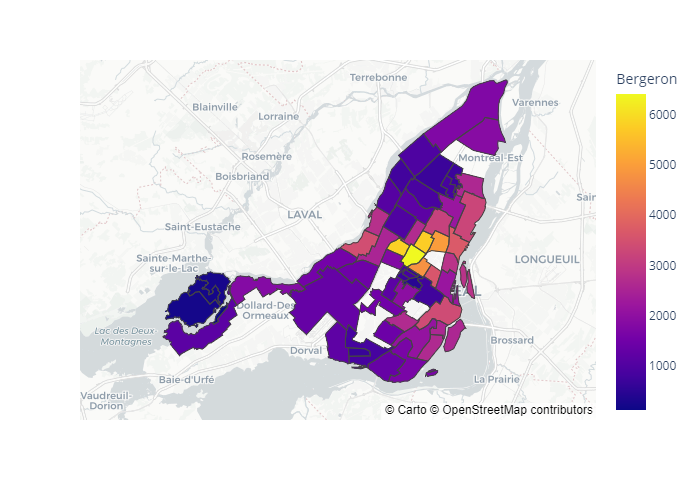

In [2]:
import plotly.express as px

geojson = px.data.election_geojson()

px.choropleth_mapbox(px.data.election(), geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)

## US County map

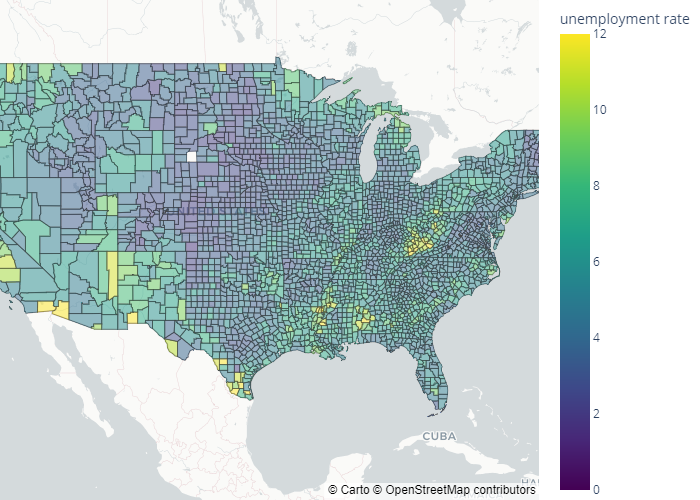

In [3]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

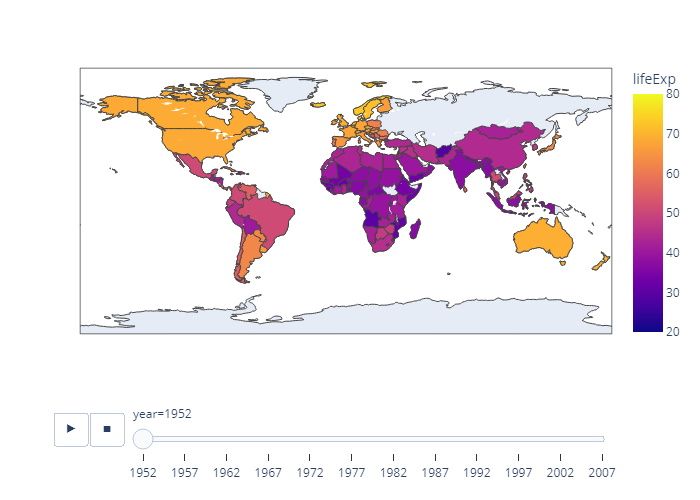

In [4]:
import plotly.express as px
px.choropleth(px.data.gapminder(), locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])

## Categorical Color

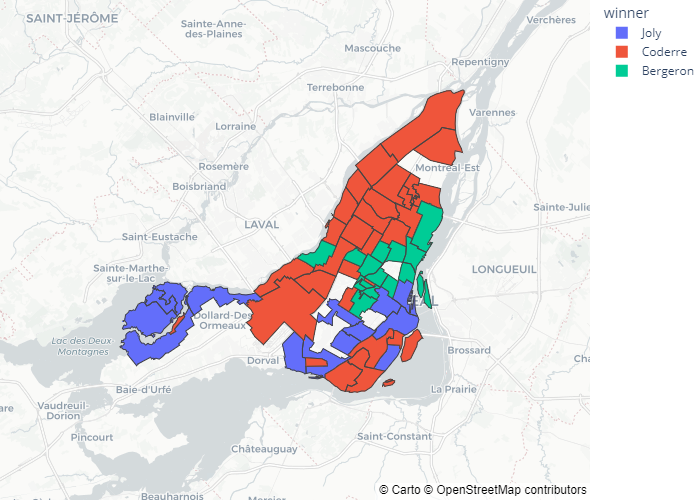

In [5]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="winner",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Using Graph Objects

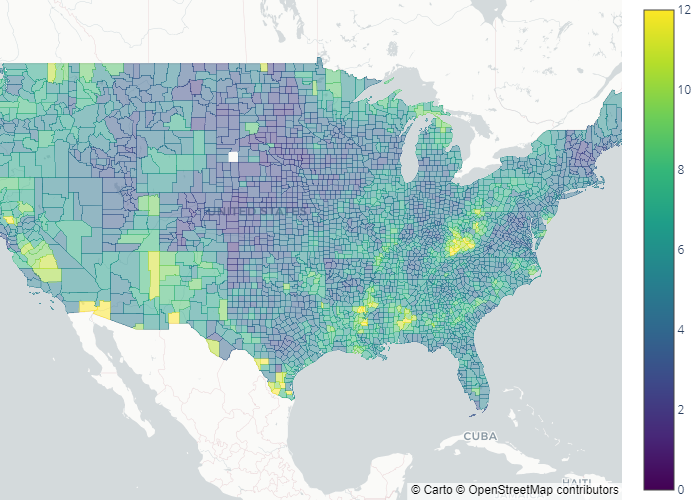

In [6]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.graph_objects as go

fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=df.fips, z=df.unemp,
                                    colorscale="Viridis", zmin=0, zmax=12,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()